In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from  tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn  as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical

In [ ]:
#Load dataset
df=pd.read_csv("/content/drug.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          200 non-null    int64  
 1   sex          200 non-null    object 
 2   bp           200 non-null    object 
 3   cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


<ipython-input-4-f6dc8c1da1d3>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='drug', data=df, palette="Set2", ax=axs[0, 2])
<ipython-input-4-f6dc8c1da1d3>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sex', data=df, palette="Set1", ax=axs[1, 0])
<ipython-input-4-f6dc8c1da1d3>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='bp', data=df, palette="pastel", ax=axs[1, 1])
<ipython-input-4-f6dc8c1da1d3>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `

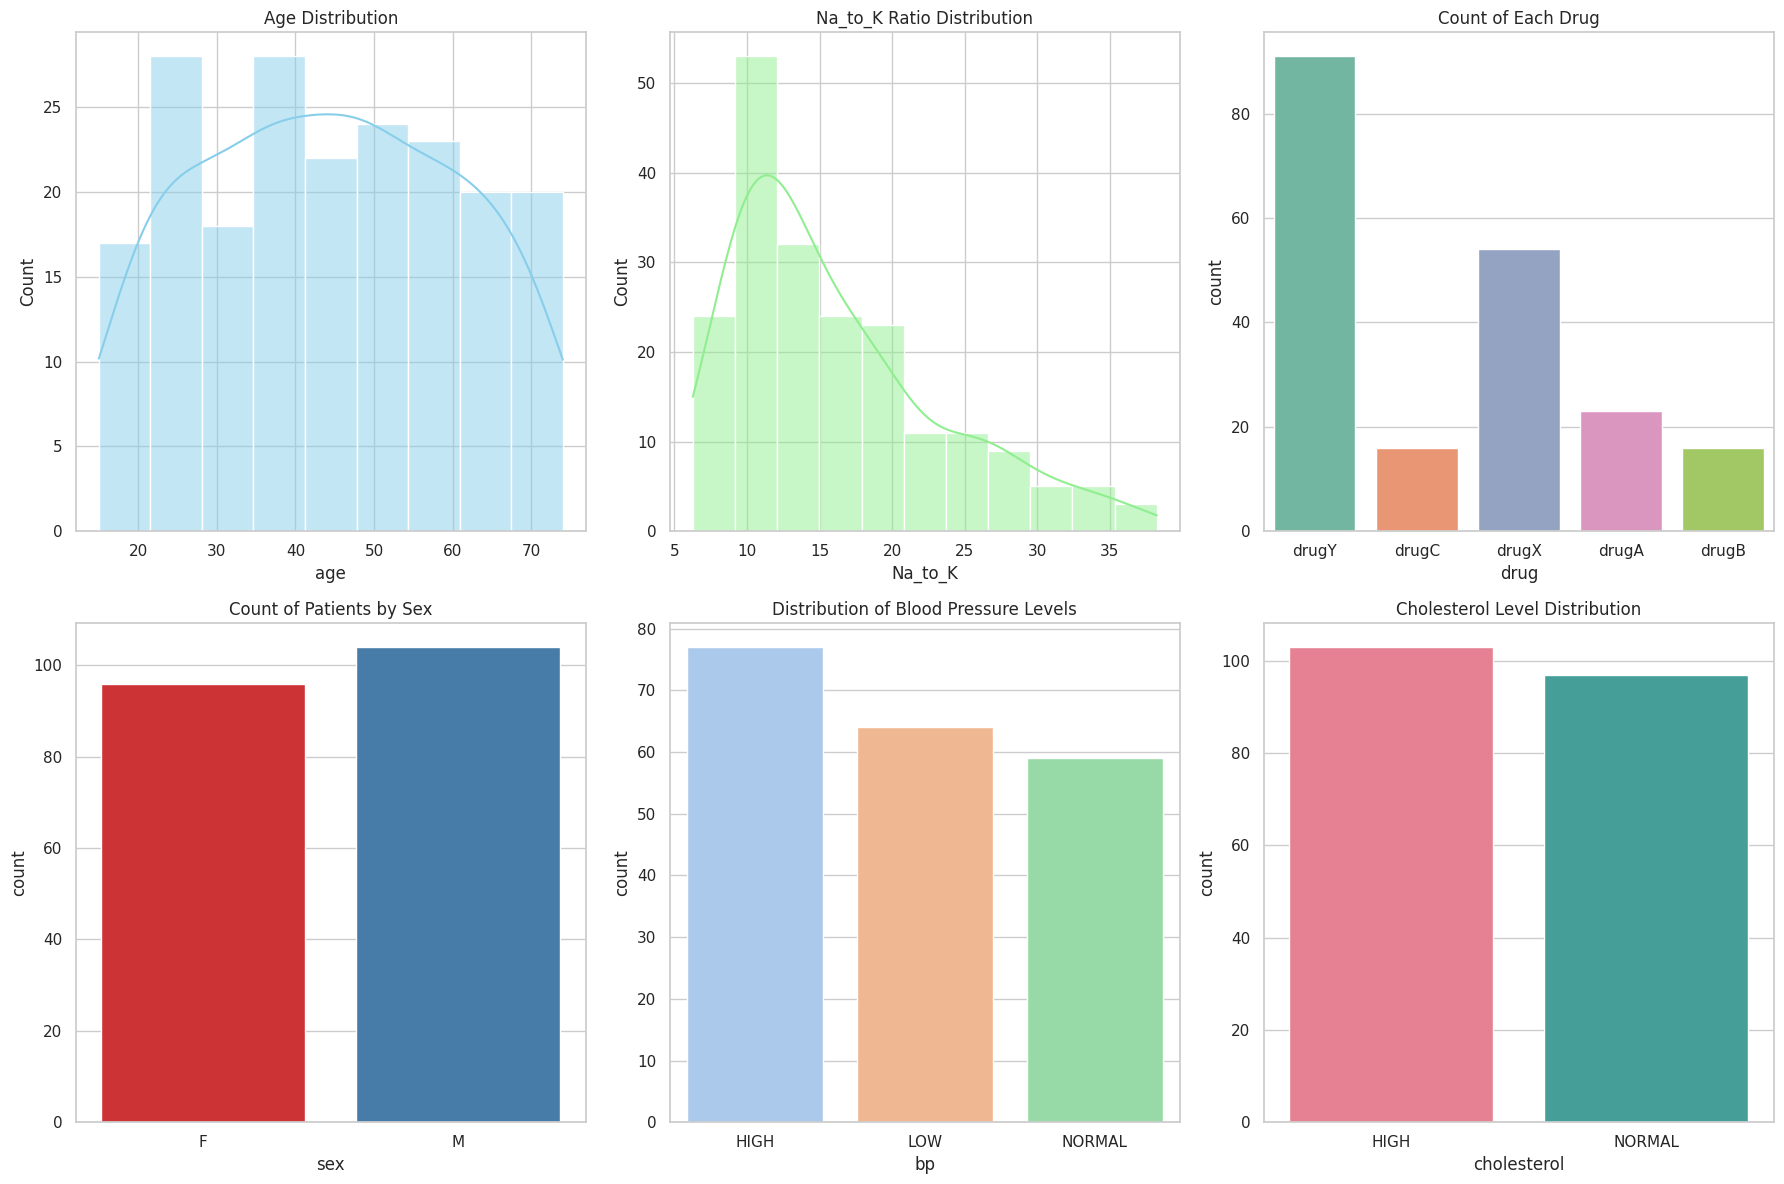

In [ ]:
#EDA
# Set up the visual style for the plots
sns.set(style="whitegrid")

# Create subplots for visualizing the different aspects of the dataset
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

# 1. Age distribution
sns.histplot(df['age'], kde=True, color="skyblue", ax=axs[0, 0])
axs[0, 0].set_title('Age Distribution')

# 2. Distribution of Na_to_K
sns.histplot(df['Na_to_K'], kde=True, color="lightgreen", ax=axs[0, 1])
axs[0, 1].set_title('Na_to_K Ratio Distribution')

# 3. Count of each drug
sns.countplot(x='drug', data=df, palette="Set2", ax=axs[0, 2])
axs[0, 2].set_title('Count of Each Drug')

# 4. Count of patients by sex
sns.countplot(x='sex', data=df, palette="Set1", ax=axs[1, 0])
axs[1, 0].set_title('Count of Patients by Sex')

# 5. Blood Pressure levels
sns.countplot(x='bp', data=df, palette="pastel", ax=axs[1, 1])
axs[1, 1].set_title('Distribution of Blood Pressure Levels')

# 6. Cholesterol levels
sns.countplot(x='cholesterol', data=df, palette="husl", ax=axs[1, 2])
axs[1, 2].set_title('Cholesterol Level Distribution')

# Adjust the layout
plt.tight_layout()
plt.show()

In [ ]:
# Encode categorical features
label_encoder_sex = LabelEncoder()
label_encoder_bp = LabelEncoder()
label_encoder_cholesterol = LabelEncoder()

df['sex'] = label_encoder_sex.fit_transform(df['sex'])
df['bp'] = label_encoder_bp.fit_transform(df['bp'])
df['cholesterol'] = label_encoder_cholesterol.fit_transform(df['cholesterol'])
# Separate features (X) and target variable (y)
X = df.drop(columns=['drug'])
label_encoder_drug = LabelEncoder()
y = label_encoder_drug.fit_transform(df['drug'])  # Encode the target variable
y = to_categorical(y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Step 2: Define the neural network architecture
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=(X_train.shape[1])))  # Input layer
model.add(Dense(32, activation='relu'))  # Hidden layer
model.add(Dense(16, activation='relu'))  # Hidden layer
model.add(Dense(y.shape[1], activation='softmax'))  # Output layer

# Step 3: Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
# Step 4: Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test),callbacks=[early_stopping])

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.1635 - loss: 1.6332 - val_accuracy: 0.2000 - val_loss: 1.5927
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.2359 - loss: 1.5806 - val_accuracy: 0.3000 - val_loss: 1.5479
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3735 - loss: 1.5253 - val_accuracy: 0.4500 - val_loss: 1.5017
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5452 - loss: 1.4781 - val_accuracy: 0.5500 - val_loss: 1.4498
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6514 - loss: 1.4286 - val_accuracy: 0.5500 - val_loss: 1.3949
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6736 - loss: 1.3834 - val_accuracy: 0.5500 - val_loss: 1.3358
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7063 - loss: 1.2940 - val_accuracy: 0.6000 - val_loss: 1.2744
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6451 - loss: 1.2299 - val_accuracy: 0.5500 - val_loss: 1.2116
Epoch 9/50


In [ ]:

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc}")

# Step 5: Prepare a single-row sample for prediction
sample_data = pd.read_csv(r"/content/single_row_sample.csv")

# Safely encode the sample data, setting unseen labels to default values
sample_data['sex'] = sample_data['sex'].apply(lambda x: label_encoder_sex.transform([x])[0] if x in label_encoder_sex.classes_ else -1)
sample_data['bp'] = sample_data['bp'].apply(lambda x: label_encoder_bp.transform([x])[0] if x in label_encoder_bp.classes_ else -1)
sample_data['cholesterol'] = sample_data['cholesterol'].apply(lambda x: label_encoder_cholesterol.transform([x])[0] if x in label_encoder_cholesterol.classes_ else -1)

# Standardize the sample data
sample_data = scaler.transform(sample_data)

# Step 6: Make a prediction
prediction = model.predict(sample_data)
predicted_class = np.argmax(prediction, axis=1)  # Get the class with highest probability

# Inverse transform the label to get the original drug name
predicted_drug = label_encoder_drug.inverse_transform(predicted_class)
print(f"Predicted drug: {predicted_drug[0]}")



2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9833 - loss: 0.0828 
Test accuracy: 0.9750000238418579
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
Predicted drug: drugA
